In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import ga
import strategies as S



In [3]:
p = ga.MonoPopulation(mutation_strength=0.02)

In [4]:
p.add_individual(lambda: ga.Individual(S.ProbProposer(), S.ProbResponder()), 100)
p.add_individual(lambda: ga.Individual(S.ChooserProposer(), S.ChooserResponder()), 100)


In [5]:
from tqdm import tqdm
for k in tqdm(range(500)):
    p.evolve()

100%|██████████| 500/500 [01:03<00:00,  7.74it/s]


In [6]:
cp = S.ChooserProposer(bins=12)

In [7]:
import numpy as np

Text(0.5, 1.0, 'Mean proposal')

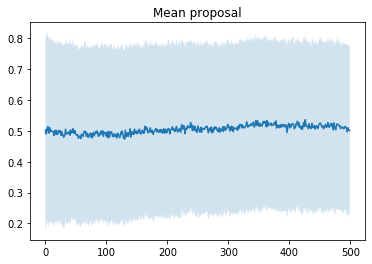

In [8]:
plt.plot(p.prop_mean_log)
plt.fill_between(range(len(p.prop_mean_log)), np.array(p.prop_mean_log) - np.array(p.prop_std_log), 
                             np.array(p.prop_mean_log) + np.array(p.prop_std_log), alpha=0.2)
plt.title('Mean proposal')

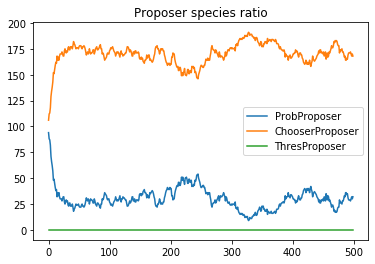

In [9]:
plt.plot([c['ProbProposer'] for c in p.proposer_counters], label='ProbProposer')
plt.plot([c['ChooserProposer'] for c in p.proposer_counters], label='ChooserProposer')
plt.plot([c['ThresProposer'] for c in p.proposer_counters], label='ThresProposer')
plt.title('Proposer species ratio')
plt.legend()

In [12]:
p.add_individual(lambda: ga.Individual(S.ThresProposer(), S.ThresResponder()), 100)


In [13]:
for k in tqdm(range(500)):
    p.evolve()

100%|██████████| 500/500 [00:09<00:00, 54.07it/s]


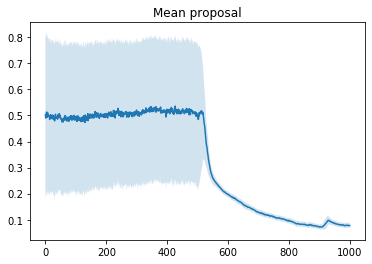

In [14]:
plt.title('Mean proposal')
plt.plot(p.prop_mean_log)
plt.fill_between(range(len(p.prop_mean_log)), np.array(p.prop_mean_log) - np.array(p.prop_std_log), 
                             np.array(p.prop_mean_log) + np.array(p.prop_std_log), alpha=0.2)

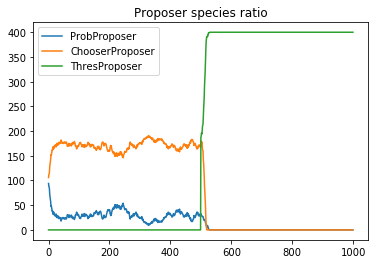

In [15]:
plt.title('Proposer species ratio')
plt.plot([c['ProbProposer'] for c in p.proposer_counters], label='ProbProposer')
plt.plot([c['ChooserProposer'] for c in p.proposer_counters], label='ChooserProposer')
plt.plot([c['ThresProposer'] for c in p.proposer_counters], label='ThresProposer')
plt.legend()